# Analysing Dataset of Google Play Store Apps & Reviews

A comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

## Import Statements

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [4]:
df_apps = pd.read_csv('data/apps.csv')

In [5]:
df_apps.shape

(10841, 12)

In [6]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [7]:
# random 5 samples from apps dataset
df_apps.sample(5) 

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
6965,CppDroid - C/C++ IDE,FAMILY,4.10,29978,19.00,"1,000,000",Free,0,Everyone,Education,"August 17, 2017",Varies with device
2155,Deaf Interpreter,MEDICAL,3.80,24,4.40,"1,000",Free,0,Everyone,Medical,"September 26, 2017",3.0 and up
1191,Sniper Gun Shot 3D: Impossible Missions,GAME,4.60,20,34.00,100,Free,0,Mature 17+,Action,"May 4, 2018",4.0 and up
5577,3D Metal Piano Keys Keyboard Theme,FOOD_AND_DRINK,4.40,467,7.30,"100,000",Free,0,Everyone,Food & Drink,"July 1, 2018",4.0.3 and up
10803,Google Play Games,ENTERTAINMENT,4.30,7165362,9.35,"1,000,000,000",Free,0,Teen,Entertainment,"July 16, 2018",Varies with device


## Data Cleaning

### Droping Columns

Removing `Last_Updated` and `Android_Version` from the DataFrame

In [8]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Working with NaN values 

extracting and removing NaN values in `Rating` column

In [9]:
nan_rows = df_apps[df_apps.Rating.isna()]
print(nan_rows.shape)
nan_rows.head()

(1474, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


In [10]:
df_apps_clean = df_apps.dropna()
df_apps_clean.shape

(9367, 10)

### Working with Duplicates

finding and removing duplicates from `df_apps_clean`

In [11]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [12]:
# duplicated Instagram records in dataframe
df_apps_clean[df_apps_clean.App == 'Instagram']    

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [13]:
df_apps_clean = df_apps_clean.drop_duplicates()

In [14]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [15]:
# need to specify the subset for indentifying duplicates
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [16]:
df_apps_clean.shape    # cleaned dataframe shape

(8199, 10)

## Finding Highest Rated Apps


In [17]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


**Highest rated apps on playstore has very few reviews.<br> we can see how this number compared to other parameters such as largest apps or mostly reviewed apps.**

## Find 5 Largest Apps in terms of Size (MBs)



In [18]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


**Sorting apps by size makes it clear that the size limit in megabytes (MB) of the largest Android apps in the Google Play Store is 100 MB.<br> Size limit is an important factor for app developers on Play Store.**

## Apps with Most Reviews

Top 50 apps with highest number of reviews

In [19]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


**Top 50 popular apps on playstore (apps with most number of reviews) are Free apps.**

## Visualising Categorical Data: Content Ratings - Plotly Pie and Donut Charts  

In [20]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

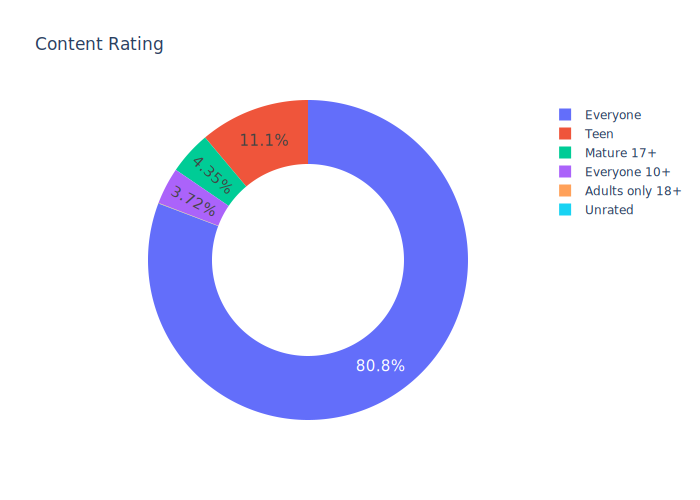

In [21]:
fig = px.pie(labels=ratings.index, 
             values=ratings.values,
             title="Content Rating",
             names=ratings.index,
             hole=0.6, # makes a donut chart =) 
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show("svg")

## Examining the Number of Installs

How many apps had over 1 BILLION installations? How many apps just had a single install?


In [22]:
df_apps_clean.Installs.describe()  

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [23]:
df_apps_clean.info()   # Installs column in dataframe has no numeric data types!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [24]:
# Installs of data type object because of the comma (,) character
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [25]:
# remormatting Installs columns and performing type conversion
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")

df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)

df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


## Finding the Most Expensive Apps, and Estimating (ballpark) Sales Revenue 


### Top 20 most expensive apps

In [26]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)

df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


**There are many most expensive apps with similar names.<br> Duplication of such apps with expensive flag questions the legitimacy of such apps.<br>Hence, dataset cleaned by setting upper threshold on price.**

### Top most expensive apps sub $250

In [27]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [28]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


**The top spot of the highest-grossing paid app goes to … Minecraft at close to 70 million.
<br>It’s quite interesting that Minecraft (along with Bloons and Card Wars) is actually listed in the Family category rather than in the Game category.<br>If we include these titles, we see that 7 out the top 10 highest-grossing apps are games. 
<br>The Google Play Store seems to be quite flexible with its category labels.**



## Analysing App Categories with Plotly

In [29]:
# Number of different categories
df_apps_clean.Category.nunique()

33

In [30]:
# Number of apps per category
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

### Highest Competition by Category on Play Store (Number of Apps) 

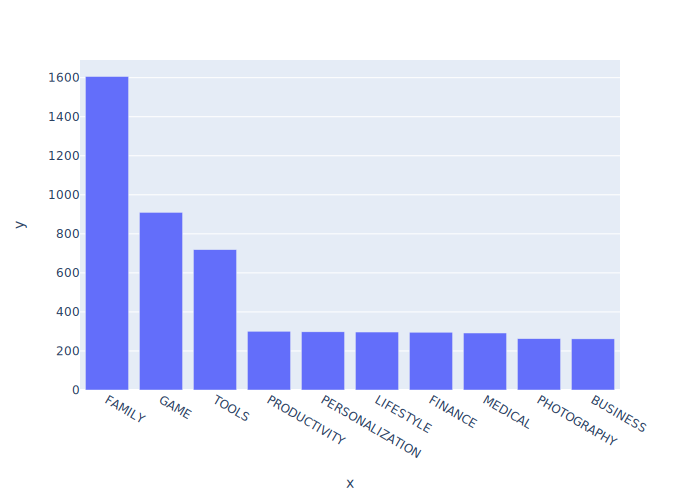

In [31]:
bar = px.bar(
        x = top10_category.index, # index = category name
        y = top10_category.values)

bar.show("svg")

**Based on the number of apps `FAMILY` and `GAME` categories are the most competitive.**

### Most Popular Categories on Play Store (Highest Downloads)

In [32]:
# Group apps by category and then sum the number of installations
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

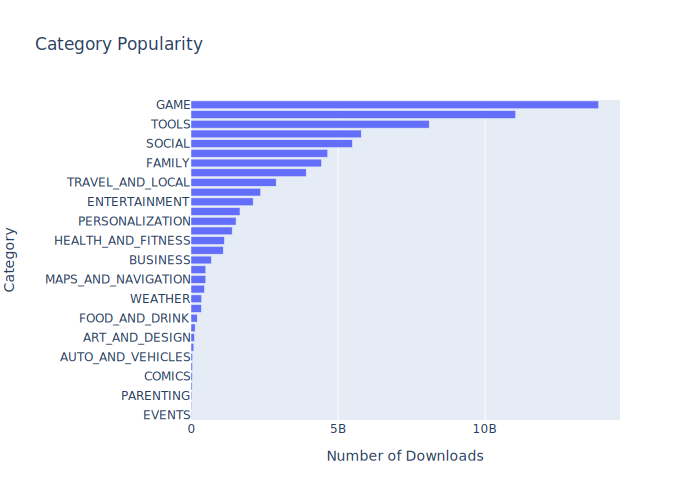

In [33]:
h_bar = px.bar(
        x = category_installs.Installs,
        y = category_installs.index,
        orientation='h',
        title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show("svg")

**Based on number of downloads `GAME`, `TOOLS`, and `SOCIAL` are the most popular categories.**

## Category Concentration - Downloads vs. Competition


In [34]:
# Count the number of apps in each category
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


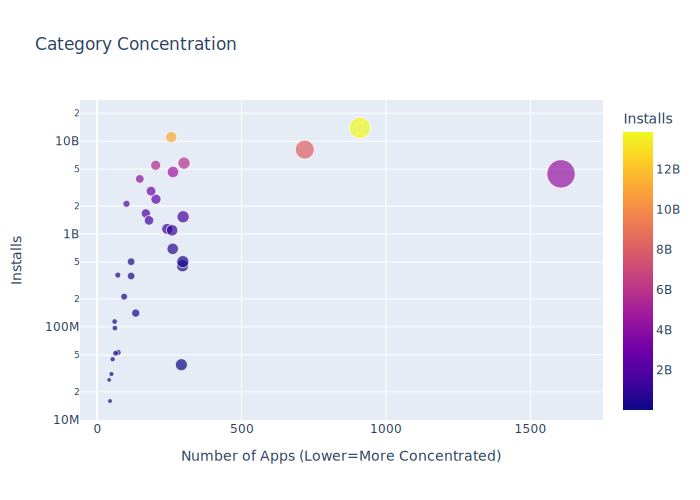

In [35]:
scatter = px.scatter(cat_merged_df, # data
                     x='App', # column name
                     y='Installs',
                     title='Category Concentration',
                     size='App',
                     hover_name=cat_merged_df.index,
                     color='Installs'
) 

scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))

scatter.show("svg")

**Based on above scatter plot diverse and popular apps belong to `FAMILY`, `GAME`, `TOOLS` category. <br>
while concentrated and popular apps belong to `COMMUNICATION`, `PRODUCTIVITY`, `SOCIAL`, and `BUSSINESS`... category.**

## Extracting Nested Data from a Column



In [36]:
# Number of Genres?
print(f"Number of unique Genres: {len(df_apps_clean.Genres.unique())}")

Number of unique Genres: 114


In [37]:
# Problem: Have multiple categories seperated by ;
df_apps_clean.Genres.value_counts().sort_values(ascending=True)[:5]

Lifestyle;Pretend Play      1
Strategy;Education          1
Adventure;Education         1
Role Playing;Brain Games    1
Tools;Education             1
Name: Genres, dtype: int64

In [38]:
# Split the strings on the semi-colon and then .stack them. 
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


## Competition in Genres

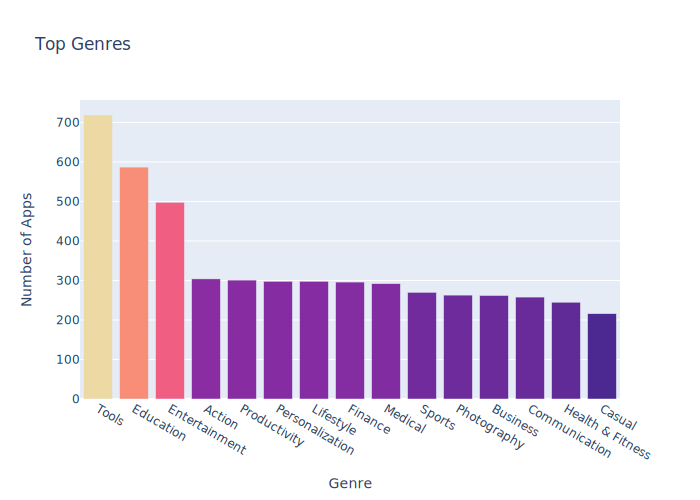

In [39]:
bar = px.bar(
        x = num_genres.index[:15], # index = category name
        y = num_genres.values[:15], # count
        title='Top Genres',
        hover_name=num_genres.index[:15],
        color=num_genres.values[:15],
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Genre',
                  yaxis_title='Number of Apps',
                  coloraxis_showscale=False)

bar.show("svg")

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [40]:
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [41]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], 
                                      as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.sort_values('App')

,Category,Type,App
3,AUTO_AND_VEHICLES,Paid,1
24,FOOD_AND_DRINK,Paid,2
38,NEWS_AND_MAGAZINES,Paid,2
40,PARENTING,Paid,2
17,ENTERTAINMENT,Paid,2
...,...,...,...
31,LIFESTYLE,Free,284
21,FINANCE,Free,289
53,TOOLS,Free,656
25,GAME,Free,834


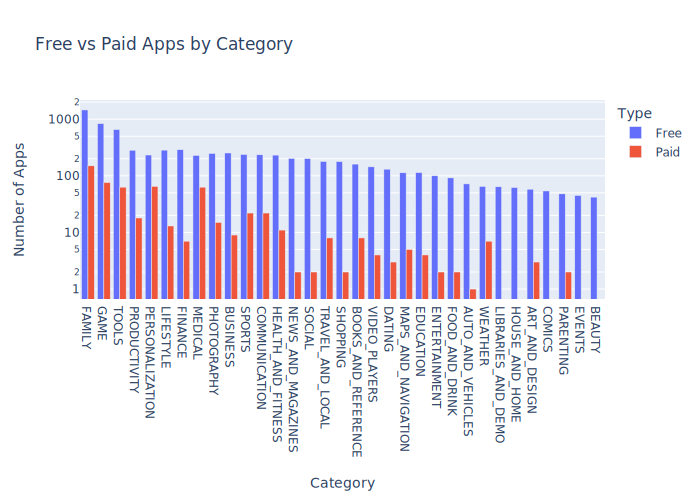

In [42]:
g_bar = px.bar(df_free_vs_paid, 
               x='Category', 
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type', 
               barmode='group',)

g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'),
                    )

g_bar.show("svg")

**It is not surprising that biggest categories (`FAMILY`, `GAME`, `TOOLS`) also have highest paid apps. <br>But, some of the more application specific categories such as `WEATHER`, `MEDICAL`, `PERSONALIZATION` have relatively high number of paid apps.**

## Stastical Analysis of Paid vs. Free Apps



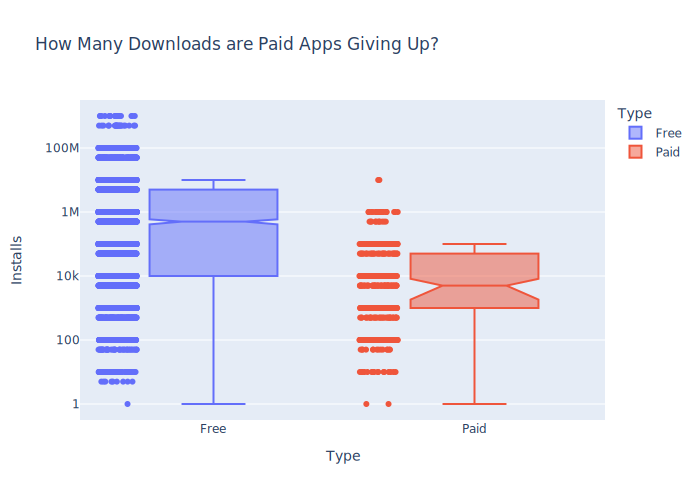

In [43]:
box = px.box(df_apps_clean, 
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?'
)

box.update_layout(yaxis=dict(type='log'))

box.show("svg")


**median number of downloads for free apps is 500,000, while the median number of downloads for paid apps is around 5,000! This is massively lower.**

## Plotly Box Plots: Revenue by App Category


In [44]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']

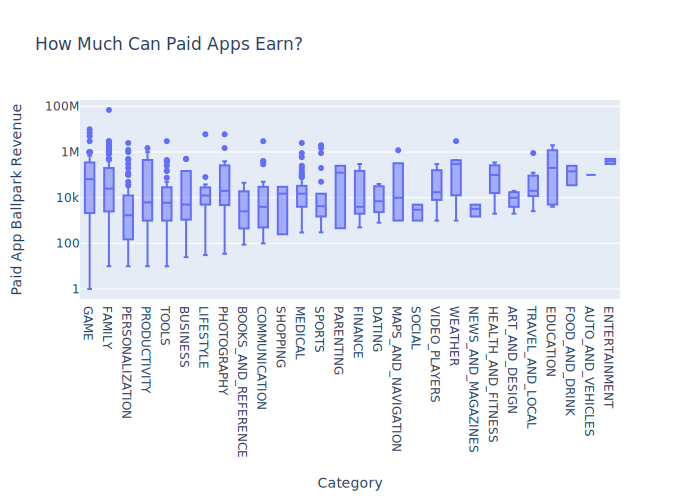

In [45]:
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))


box.show("svg")

**If an Android app costs <span>$30,000</span> to develop, then the average app in very few categories would cover that development cost.<br>The median paid photography app earned about &#36;20,000. Many more app’s revenues were even lower - meaning they would need other sources of revenue like advertising or in-app purchases to make up for their development costs. <br>However, certain app categories seem to contain a large number of outliers that have much higher (estimated) revenue - for example in Medical, Personalisation, Tools, Game, and Family.**

## Examining Paid App Pricing Strategies by Category
### How much can we charge?

**Challenge**: <br>
What is the median price price for a paid app? <br> Then compare pricing by category by creating box plot.

In [46]:
print(f"Median price for paid apps: {df_paid_apps.Price.median()}")

Median price for paid apps: 2.99


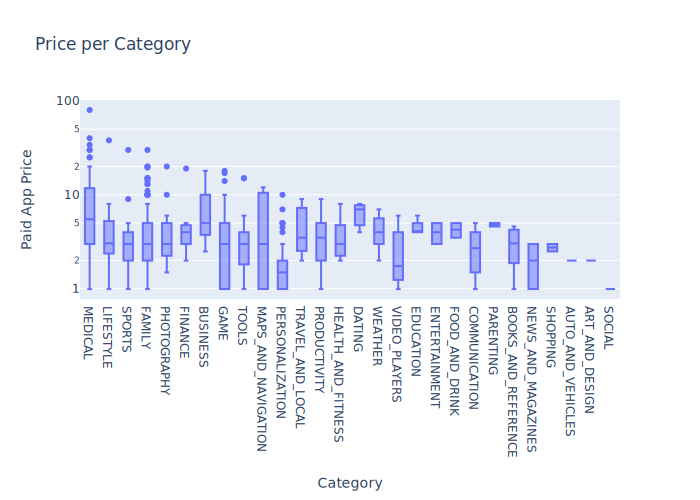

In [47]:
box = px.box(df_paid_apps, 
             x='Category', 
             y="Price",
             title='Price per Category')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))


box.show("svg")

**some categories have higher median prices than others. <br> `Medical` apps have the most expensive apps as well as a median price of &#36;5.49. In contrast, `Personalisationapps` are quite cheap on average at &#36;1.49. Other categories which higher median prices are `Business` (&#36;4.99) and `Dating` (&#36;6.99). <br> Customers who shop in these categories are not so concerned about paying a bit extra for their apps.**